
# Exercício Prático - Comparativo com Vinhos

Classificação de Qualidade de Vinhos do tipo 'Tinto' (Arquivo fornecido junto com notebook - 'winequality-red.csv')

Utilizar as técnicas de Cross-Validation e StratifiedKFold no problema de classificação dos Vinhos

# 1 - Extração dos Atributos



In [10]:
# Seus códigos para a etapa 1 deverão ser criados aqui:
import pandas as pd
import matplotlib.pyplot as plt
arquivo = "https://raw.githubusercontent.com/ByDaniel101/Arquivos_Aulas_e_Testes/master/winequality-red.csv"
dataset = pd.read_csv(arquivo, delimiter = ";", header = 0)

#print(dataset.shape)
print(dataset.groupby('quality').size())


quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


# 2 - Divisão dos Dados com Cross-Validation


In [11]:
# Seus códigos para a etapa 2 deverão ser criados aqui:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = dataset.values
X = array[:,0:11]
y = array[:,11]

# separação treino e validação
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# criando o modelo e aplicando o cross_validation
model = LogisticRegression(solver='liblinear', multi_class='ovr')
cv_results = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
print('cv_results ', cv_results)

cv_results  [0.58984375 0.515625   0.625      0.58984375 0.57254902]


In [12]:
# exibindo os resultados individualmente
print(f'{len(cv_results)} treinamentos realizados')

# print por resultado
for valor in cv_results:
  print(f'resultado treino: {valor}')

5 treinamentos realizados
resultado treino: 0.58984375
resultado treino: 0.515625
resultado treino: 0.625
resultado treino: 0.58984375
resultado treino: 0.5725490196078431


In [13]:
print(f'LR, média{cv_results.mean()} e desvio padrão {cv_results.std()}')

LR, média0.5785723039215686 e desvio padrão 0.0358001815120188


# 3 - Comparativo entre Modelos Com Cross-Validation e StratifiedKFold


In [14]:
# Seus códigos para a etapa 3 deverão ser criados aqui: 
# carregando todos os modelos e funções necessárias
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# carregando os modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




modelo LR: média 0.569991 desvio(0.026724)
modelo KNN: média 0.498863 desvio(0.038901)
modelo SVM: média 0.561403 desvio(0.020633)
modelo CART: média 0.590316 desvio(0.016565)
modelo LDA: média 0.590340 desvio(0.041203)
modelo NB: média 0.527773 desvio(0.030445)


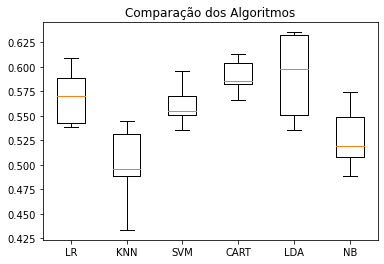

[0.54296875 0.5703125  0.609375   0.5390625  0.58823529]
[0.49609375 0.48828125 0.53125    0.43359375 0.54509804]
[0.5546875  0.5703125  0.55078125 0.53515625 0.59607843]
[0.58203125 0.56640625 0.61328125 0.5859375  0.60392157]
[0.53515625 0.59765625 0.6328125  0.55078125 0.63529412]
[0.5078125  0.51953125 0.57421875 0.48828125 0.54901961]


In [15]:
# dividindo os conjuntos aleatoriamente
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# criando os modelos e adicionando num vetor de tuplas pra facilitar o código
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))

# avaliando cada um dos modelos utilizando cross-validation com stratified
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('modelo %s: média %f desvio(%f)' % (name, cv_results.mean(), cv_results.std()))
 
 # Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Comparação dos Algoritmos')
plt.show()

# exibindo os resultados gerais
for result in results:
  print(result)